In [1]:
# Import Necessary Packages
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime

In [2]:
# Import ML Necessary Packages and Evaluation Metrices
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, classification_report

# Escape Rate (Accepted): # of False Negatives / # of All Predictions
# Escape Rate is a classification application that incorrectly predicts a defective part as good
 
# Overkill Rate (Rejected): # of False Positives/ # of All Predictions
# Overkill Rate is a classification application that produces false positive predictions generates overkill, meaning good products or parts without defects are mistakenly removed from the production line.
# Reference Articel: https://www.researchgate.net/profile/Han-Liu-18/publication/348227223_Performance_Evaluation_of_Deep_Learning_Classification_Network_for_Image_Features/links/6063d655299bf173677dca56/Performance-Evaluation-of-Deep-Learning-Classification-Network-for-Image-Features.pdf?origin=publication_detail

In [3]:
# Import Tensorflow Packages
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import Input, datasets, layers, models

# Install the dataset: CIFAR-10
from tensorflow.keras.datasets import cifar10

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta
from tensorflow.keras.layers import ReLU,add, LeakyReLU
from keras.layers import MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers import Dropout, Add, Concatenate

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler

!pip install pydot
!pip install graphviz
!pip install pydotplus

import pydot
import graphviz
import pydotplus

# You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.

# Explaining the Package:
# Sequential Model is a linear stack of layers. A sequential model is appropriate for plain stack of layers where each layer has exactly one input tensor and one output tensor.
# Dense layer is the regular connected neural network layer. It is most common and freqiently used layer. 
# EarlyStopping is crucial mainly because it stop training the model when a monitored metric has stopped improving.
# Keras layer consist of a tensor-in tensor-out computation function, A layer instance is callable.
# Keras optimizer is used to change the attributes of the model, including the weighting, the learning rate to minimize the losses.
# Keras regularizer allow us to apply penalties ib layer parameter/ layer activity during optimization.
# Keras callback is an object that to perform actions at various stage of training. Callback can be used to write tensorboard logs after eevry batch of training/ monitor your metrics

In [4]:
# Import Image Processing Packages, Pillow and OpenCV
!pip install Pillow
!pip3 install opencv-python
from PIL import Image
import cv2
# Reference: https://medium.com/@danielpaz601/how-to-crack-a-real-captcha-image-using-deep-learning-338c757272e0
# Reference: https://www.delftstack.com/howto/python/python-display-image/

# Matplotlib Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
# Reference: https://matplotlib.org/stable/tutorials/introductory/images.html

# Import skimage from scikit-learn
from skimage import io
from skimage import filters
# io mdodule is used to read and write images in various formats.
# filters modeule is used to read the filter the features of the images

In [5]:
# Import and Read the Dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
cifar_10 = cifar10.load_data()

In [6]:
# Check the dataset size
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\willi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


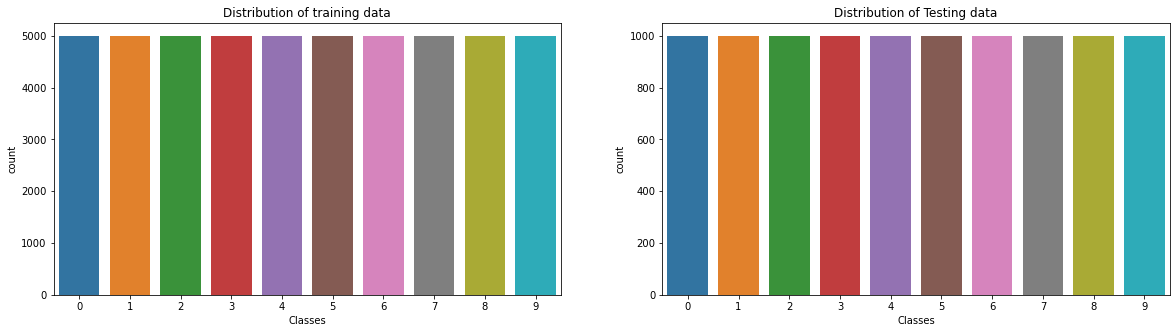

In [7]:
# Find the unique value and plot it
fig, axs = plt.subplots(1,2,figsize=(20,5)) 

# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')

# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')

plt.show()

In [8]:
# Check the dimensionality of the y_train data
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [9]:
# Change the dimensional array from 2 to 1
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

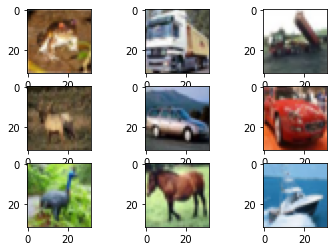

In [10]:
# Call numbers of images
img_rows, img_cols , channels= 32,32,3
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [11]:
# Understand that CIFAR-10 dataset consist of 10 different data
# Assign the name of the data
classes=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [12]:
# Keras provides numpy utility library, which provides functions to perform actions on numpy arrays.

# from keras.utils import np_utils
# Change the data type and normalize the dataset
# Explain why 255, not 256?
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the mean and standard deviation
mu= np.mean(x_train)
std= np.std(x_train)

# Normalize the data by using X-mu/SD
x_train= (x_train-mu)/std
x_test= (x_test-mu)/std

# Convert the class vectors into binary class
num_classes= 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test= tf.keras.utils.to_categorical(y_test, num_classes)

In [13]:
##### We now set up image augementation using  the dataset
imgdatagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
imgdatagen.fit(x_train)

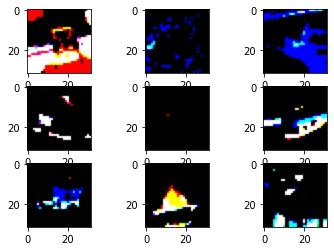

In [14]:
for x_batch, y_batch in imgdatagen.flow(x_train, y_train, batch_size= 10):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i].astype(np.uint8))
    plt.show()
    break

In [15]:
# Reshape the dataset
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [16]:
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [17]:
# Model 1 with kernel regularizer, padding, and activation ReLu applied 30 epochs tested without data augmentation
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv =0

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis= -1))
model.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis= -1))
model.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model.add(BatchNormalization(axis =-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation= ac,kernel_regularizer= reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'],optimizer= opt)

In [18]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [19]:
# Plot the layer
!pip install graphviz
import graphviz
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
# Fit the model without augmentation
history= model.fit(x_train, y_train, batch_size=128, epochs= 30, validation_data=(x_test, y_test))
history

Epoch 1/30
391/391 [==============================] - 204s 508ms/step - loss: 1.4756 - accuracy: 0.5147 - val_loss: 1.1638 - val_accuracy: 0.5871
Epoch 2/30
391/391 [==============================] - 198s 505ms/step - loss: 0.8593 - accuracy: 0.6977 - val_loss: 0.8182 - val_accuracy: 0.7142
Epoch 3/30
391/391 [==============================] - 215s 549ms/step - loss: 0.6705 - accuracy: 0.7651 - val_loss: 0.7077 - val_accuracy: 0.7613
Epoch 4/30
391/391 [==============================] - 196s 502ms/step - loss: 0.5588 - accuracy: 0.8035 - val_loss: 0.7630 - val_accuracy: 0.7388
Epoch 5/30
391/391 [==============================] - 194s 496ms/step - loss: 0.4738 - accuracy: 0.8337 - val_loss: 0.6708 - val_accuracy: 0.7810
Epoch 6/30
391/391 [==============================] - 196s 502ms/step - loss: 0.3938 - accuracy: 0.8613 - val_loss: 0.6699 - val_accuracy: 0.7893
Epoch 7/30
391/391 [==============================] - 193s 495ms/step - loss: 0.3281 - accuracy: 0.8853 - val_loss: 0.7068 -

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 1.1090 - accuracy: 0.8052


[1.1089882850646973, 0.8051999807357788]

In [22]:
# Print the accuracy without dropout applied
train_acc= model.evaluate(x_train, y_train, batch_size=128)
train_acc

391/391 [==============================] - 55s 142ms/step - loss: 0.0413 - accuracy: 0.9853


[0.0413060262799263, 0.9853000044822693]

In [23]:
# Print the accuracy without dropout applied, the best is in 30
test_acc= model.evaluate(x_test, y_test, batch_size=128)
test_acc

79/79 [==============================] - 13s 158ms/step - loss: 1.1090 - accuracy: 0.8052


[1.1089880466461182, 0.8051999807357788]

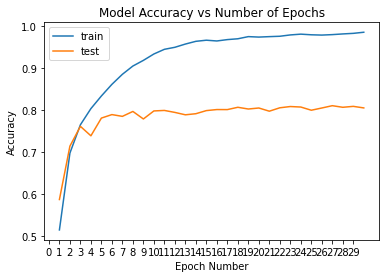

In [24]:
# Plot the accuracy result
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,30,1))
plt.show()

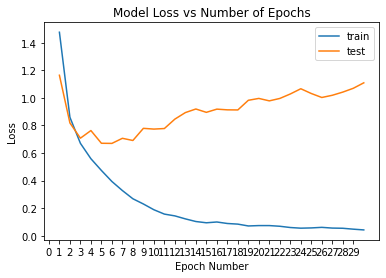

In [25]:
# Plot the loss result
plt.plot(range(1,1+len(history.history['loss'])), history.history['loss'])
plt.plot(range(1,1+len(history.history['val_loss'])), history.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0,30,1))
plt.show()

In [26]:
# Print the best test accuracy to the value of epochs
best_score = max(history.history['val_accuracy'])
best_epoch = np.array(history.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.810500 at epoch 27


In [28]:
# Model 2 applied data augmentation with epochs of 100
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv =0

model2 = Sequential()

model2.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv))

model2.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis= -1))
model2.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv))

model2.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis= -1))
model2.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model2.add(BatchNormalization(axis =-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv))

model2.add(Flatten())
model2.add(Dense(512, activation= ac,kernel_regularizer= reg))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense))
model2.add(Dense(num_classes, activation= 'softmax'))

model2.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= opt)

In [29]:
# Summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [30]:
# Train the model with data augmentation
history2=model2.fit_generator(imgdatagen.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 100, validation_data=(x_test, y_test))

<ipython-input-30-1461f70e26d0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(imgdatagen.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 100, validation_data=(x_test, y_test))


Epoch 1/100
390/390 [==============================] - 283s 700ms/step - loss: 1.6601 - accuracy: 0.4488 - val_loss: 1.2095 - val_accuracy: 0.5689
Epoch 2/100
390/390 [==============================] - 261s 669ms/step - loss: 1.0884 - accuracy: 0.6158 - val_loss: 1.0061 - val_accuracy: 0.6567
Epoch 3/100
390/390 [==============================] - 245s 625ms/step - loss: 0.8908 - accuracy: 0.6865 - val_loss: 0.9640 - val_accuracy: 0.6820
Epoch 4/100
390/390 [==============================] - 269s 687ms/step - loss: 0.7893 - accuracy: 0.7226 - val_loss: 0.8294 - val_accuracy: 0.7308
Epoch 5/100
390/390 [==============================] - 292s 746ms/step - loss: 0.7167 - accuracy: 0.7495 - val_loss: 0.6807 - val_accuracy: 0.7671
Epoch 6/100
390/390 [==============================] - 246s 629ms/step - loss: 0.6599 - accuracy: 0.7701 - val_loss: 0.7256 - val_accuracy: 0.7581
Epoch 7/100
390/390 [==============================] - 255s 652ms/step - loss: 0.6188 - accuracy: 0.7852 - val_loss: 0

In [31]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.4057 - accuracy: 0.8885


[0.40566349029541016, 0.8884999752044678]

In [32]:
# Print the accuracy without dropout applied
train_acc2= model2.evaluate(x_train, y_train, batch_size=128)
train_acc2

391/391 [==============================] - 25s 64ms/step - loss: 0.0769 - accuracy: 0.9725


[0.07692752033472061, 0.9725000262260437]

In [33]:
# Print the accuracy without dropout applied, the best is in 30
test_acc2= model2.evaluate(x_test, y_test, batch_size=128)
test_acc2

79/79 [==============================] - 5s 65ms/step - loss: 0.4057 - accuracy: 0.8885


[0.40566354990005493, 0.8884999752044678]

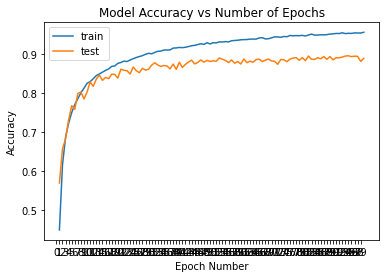

In [34]:
# Plot the accuracy result
plt.plot(range(1,1+len(history2.history['accuracy'])), history2.history['accuracy'])
plt.plot(range(1,1+len(history2.history['val_accuracy'])), history2.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 100, 10))
plt.show()

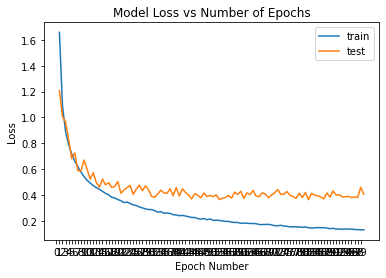

In [35]:
# Plot the loss result
plt.plot(range(1,1+len(history2.history['loss'])), history2.history['loss'])
plt.plot(range(1,1+len(history2.history['val_loss'])), history2.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 100, 10))
plt.show()

In [36]:
# Print the best test accuracy to the value of epochs
best_score = max(history2.history['val_accuracy'])
best_epoch = np.array(history2.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.895000 at epoch 95


In [43]:
# Build a Model with data augmentation with epochs= 30
reg= None
num_filters= 32
ac= 'relu'
adm= Adam(learning_rate= 0.001, decay= 0, beta_1= 0.9, beta_2= 0.999, epsilon= 1e-08)
opt= adm
drop_dense= 0.5
drop_conv =0

model3 = Sequential()

model3.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, input_shape= (img_rows, img_cols, channels), padding= 'same'))
model3.add(BatchNormalization(axis=-1))
model3.add(Conv2D(num_filters, (3, 3), activation= ac, kernel_regularizer= reg, padding= 'same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))   
model3.add(Dropout(drop_conv))

model3.add(Conv2D(2*num_filters, (3, 3), activation= ac, kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis= -1))
model3.add(Conv2D(2*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))   
model3.add(Dropout(drop_conv))

model3.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis= -1))
model3.add(Conv2D(4*num_filters, (3, 3), activation= ac,kernel_regularizer= reg,padding= 'same'))
model3.add(BatchNormalization(axis =-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))   
model3.add(Dropout(drop_conv))

model3.add(Flatten())
model3.add(Dense(512, activation= ac,kernel_regularizer= reg))
model3.add(BatchNormalization())
model3.add(Dropout(drop_dense))
model3.add(Dense(num_classes, activation= 'softmax'))

model3.compile(loss= 'categorical_crossentropy', metrics= ['accuracy'], optimizer= opt)

In [44]:
# Train the model with data augmentation with epochs= 30
history3= model3.fit_generator(imgdatagen.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))

Epoch 1/30


<ipython-input-44-6f03f1aa716c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3= model3.fit_generator(imgdatagen.flow(x_train, y_train, batch_size= 128), steps_per_epoch= len(x_train)/128, epochs= 30, validation_data=(x_test, y_test))


390/390 [==============================] - 114s 289ms/step - loss: 1.6583 - accuracy: 0.4537 - val_loss: 1.1672 - val_accuracy: 0.5810
Epoch 2/30
390/390 [==============================] - 116s 296ms/step - loss: 1.1082 - accuracy: 0.6078 - val_loss: 0.9932 - val_accuracy: 0.6581
Epoch 3/30
390/390 [==============================] - 118s 303ms/step - loss: 0.8970 - accuracy: 0.6859 - val_loss: 0.7713 - val_accuracy: 0.7334
Epoch 4/30
390/390 [==============================] - 107s 275ms/step - loss: 0.7797 - accuracy: 0.7267 - val_loss: 0.7048 - val_accuracy: 0.7594
Epoch 5/30
390/390 [==============================] - 110s 281ms/step - loss: 0.7056 - accuracy: 0.7557 - val_loss: 0.6739 - val_accuracy: 0.7684
Epoch 6/30
390/390 [==============================] - 131s 334ms/step - loss: 0.6512 - accuracy: 0.7733 - val_loss: 0.7155 - val_accuracy: 0.7634
Epoch 7/30
390/390 [==============================] - 125s 319ms/step - loss: 0.6033 - accuracy: 0.7925 - val_loss: 0.5828 - val_accura

In [45]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.4364 - accuracy: 0.8663


[0.4363599717617035, 0.8662999868392944]

In [46]:
# Print the accuracy without dropout applied
train_acc3= model3.evaluate(x_train, y_train, batch_size=128)
train_acc3

391/391 [==============================] - 25s 64ms/step - loss: 0.2293 - accuracy: 0.9207


[0.2293144166469574, 0.9206600189208984]

In [47]:
# Print the accuracy without dropout applied
test_acc3= model3.evaluate(x_test, y_test, batch_size=128)
test_acc3

79/79 [==============================] - 5s 66ms/step - loss: 0.4364 - accuracy: 0.8663


[0.43635982275009155, 0.8662999868392944]

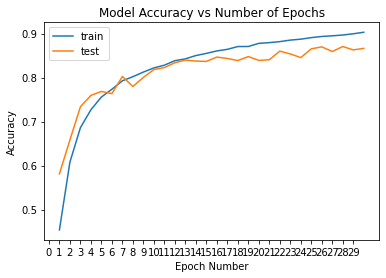

In [51]:
# Plot the accuracy result
plt.plot(range(1,1+len(history3.history['accuracy'])), history3.history['accuracy'])
plt.plot(range(1,1+len(history3.history['val_accuracy'])), history3.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

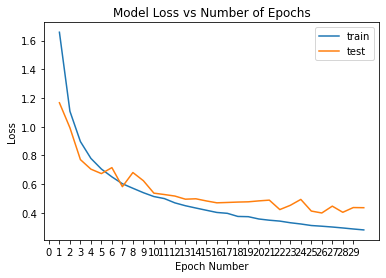

In [52]:
# Plot the loss result
plt.plot(range(1,1+len(history3.history['loss'])), history3.history['loss'])
plt.plot(range(1,1+len(history3.history['val_loss'])), history3.history['val_loss'])
plt.title('Model Loss vs Number of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.xticks(np.arange(0, 30, 1))
plt.show()

In [50]:
# Print the best test accuracy to the value of epochs
best_score = max(history3.history['val_accuracy'])
best_epoch = np.array(history3.history['val_accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.870400 at epoch 28


In [ ]:
# Tune with other parameters